In [1]:
from cellpilot.inference.inference import Inference
import numpy as np
from PIL import Image
import cv2

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.17 (you have 1.4.11). Upgrade using: pip install --upgrade albumentations


In [2]:
# Replace with your model directory and model name
config = {
    "device": "cuda",
    "model_dir": "/vol/data/models/",
    "model_name": "model-ap0xl4l1:v19"
}
inference = Inference(config)

In [3]:
# Replace with the path to the image you want to analyze
image_name = "/home/ubuntu/thesis/data/CPM_15_and_17/cpm15/Images/image_01.png"
img = Image.open(image_name)
img_np = np.array(img)

In [37]:
prompt = {
    "point_coords": np.array([[30, 90]]),
    "point_labels": np.array([1])
}


In [38]:
masks = inference.segment(prompt, img_np)

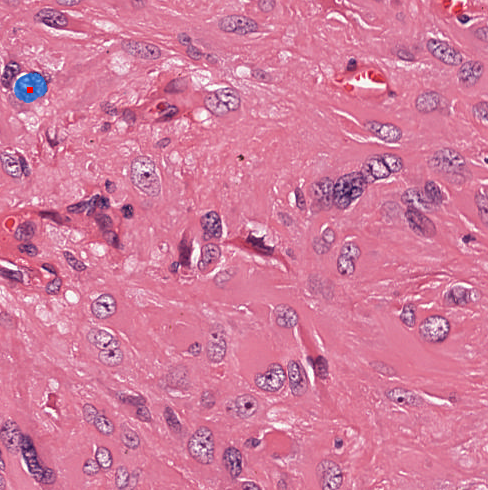

In [39]:
points = np.zeros_like(masks)
h, w = masks.shape
x = prompt["point_coords"][0][0]
y = prompt["point_coords"][0][1]
offset = 3
y_min = max(0, y - offset)
y_max = min(h, y + offset)
x_min = max(0, x - offset)
x_max = min(w, x + offset)
points[y_min:y_max, x_min:x_max] = 1
masks_binary = masks > 0
color = np.array([30, 144, 255]).astype(np.uint8)
colored_mask = masks_binary.reshape(h, w, 1) * color.reshape(1, 1, -1)
colored_mask = colored_mask.astype(np.uint8)
overlay =  np.where(colored_mask > 0, 0.4 * img_np, img_np)
overlay = overlay.astype(np.uint8)
overlay = cv2.addWeighted(overlay, 1.0, colored_mask, 0.6, 0.0)
overlay[:,:,0] = np.where(points > 0, 255, overlay[:,:,0])
overlay[:,:,1] = np.where(points > 0, 0, overlay[:,:,1])
overlay[:,:,2] = np.where(points > 0, 0, overlay[:,:,2])
Image.fromarray(overlay)

In [48]:
prompt = {
    "boxes": np.array([10, 70, 50, 100]),
}


In [49]:
masks = inference.segment(prompt, img_np)

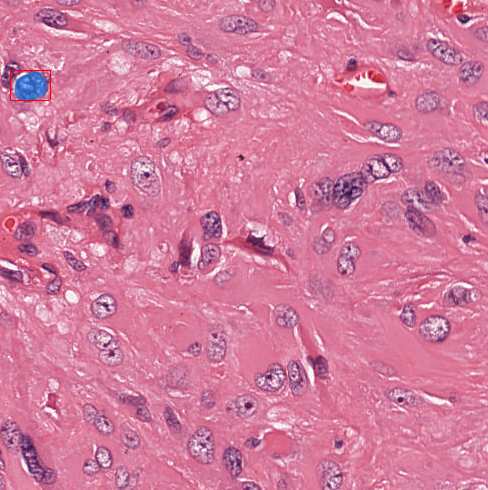

In [50]:
boxes = np.zeros_like(masks)
h, w = masks.shape
y_min = max(0, prompt["boxes"][1])
y_max = min(h, prompt["boxes"][3])
x_min = max(0, prompt["boxes"][0])
x_max = min(w, prompt["boxes"][2])
boxes[y_min, x_min:x_max] = 1
boxes[y_max, x_min:x_max] = 1
boxes[y_min:y_max, x_min] = 1
boxes[y_min:y_max, x_max] = 1
points[y_min:y_max, x_min:x_max] = 1
masks_binary = masks > 0
color = np.array([30, 144, 255]).astype(np.uint8)
colored_mask = masks_binary.reshape(h, w, 1) * color.reshape(1, 1, -1)
colored_mask = colored_mask.astype(np.uint8)
overlay =  np.where(colored_mask > 0, 0.4 * img_np, img_np)
overlay = overlay.astype(np.uint8)
overlay = cv2.addWeighted(overlay, 1.0, colored_mask, 0.6, 0.0)
overlay[:,:,0] = np.where(boxes > 0, 255, overlay[:,:,0])
overlay[:,:,1] = np.where(boxes > 0, 0, overlay[:,:,1])
overlay[:,:,2] = np.where(boxes > 0, 0, overlay[:,:,2])
Image.fromarray(overlay)